In [0]:
!pip install altair_viewer #Need to install this package

In [0]:
# Load calculation and visulization library
import numpy as np
import pandas as pd
from pandas import set_option
from numpy import arange

import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import altair as alt
import altair_viewer
alt.renderers.enable('altair_viewer', inline=True)

# ML library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
#from tpot import TPOTClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import data from KAGGLE

Colab library to upload files to notebook
from google.colab import files

Upload kaggle API key file (from local driver, download API Kaggel first)
uploaded = files.upload()

Link KAGGLE
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Download data for the nyc_taxi_trip_duration challenge
!kaggle datasets download -d ronitf/heart-disease-uci

Unzip datasets and load to Pandas dataframe
!unzip -q heart-disease-uci.zip -d .

### Load Dataset

In [0]:
#Load data set:
dt= pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* 3.age
* 4.sex (1 = male; 0 = female))
* 9.chest pain type (4 values) - cp 
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* 10.resting blood pressure - trestbps
* 12.serum cholestoral in mg/dl - chol
* 16.fasting blood sugar ((fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))- fbs
* 19.resting electrocardiographic results (values 0,1,2) - restecg
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* 32.maximum heart rate achieved - thalach
* 38.exercise induced angina - exang  (1 = yes; 0 = no)
* 40.oldpeak = ST depression induced by exercise relative to rest - oldpeak
* 41.the slope of the peak exercise ST segment - slope
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* 44.number of major vessels (0-3) colored by flourosopy - ca
* 51.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect - thai
* 58.target: 1: yes, 0: No
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [0]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Descriptive Statistics

In [0]:
dt.shape

(303, 14)

In [0]:
dt.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

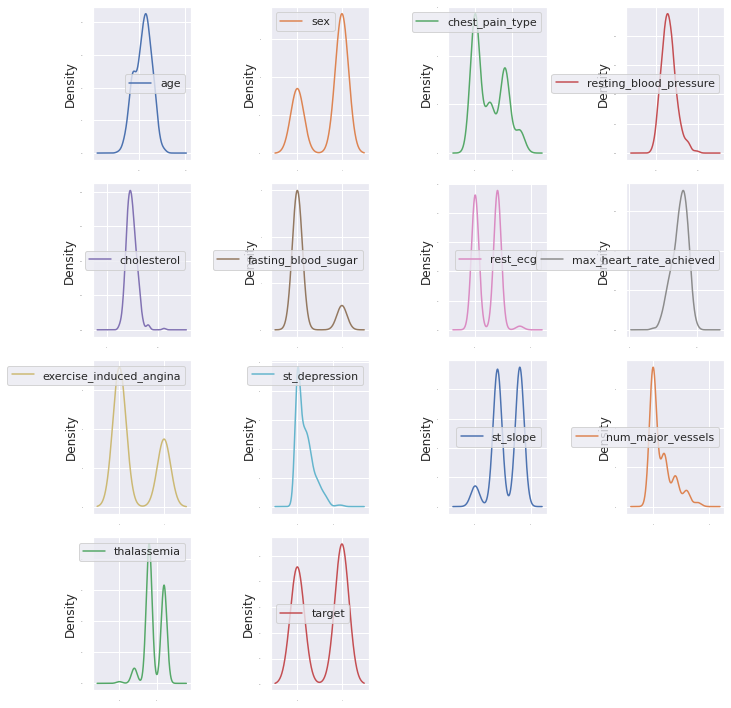

In [0]:
dt.plot(kind='density',subplots=True,layout=(4,4),sharex=False,
             fontsize=1,legend=True,figsize=(10,10))
plt.tight_layout()

In [0]:
#sns.pairplot(dt)
#plt.show()

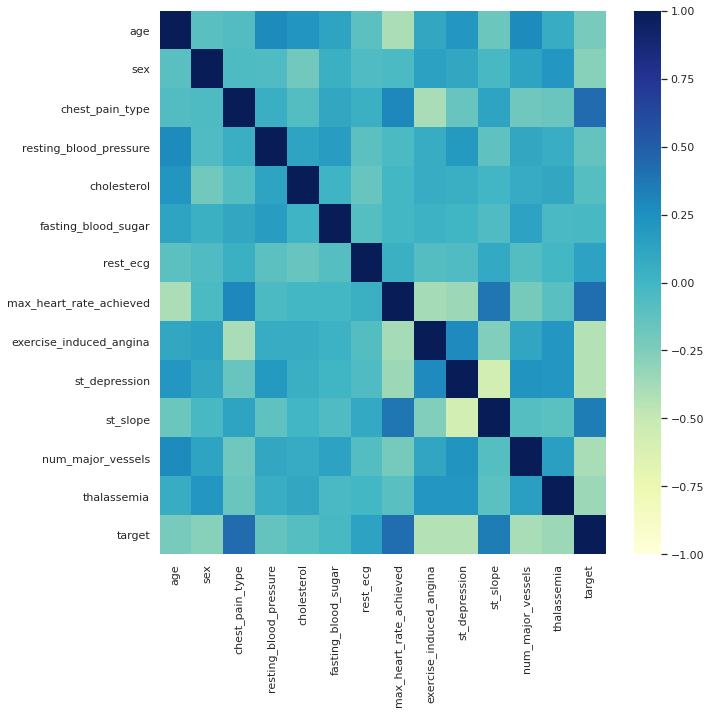

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dt.corr(), vmin=-1, vmax=1, annot = False,cmap="YlGnBu",ax=ax)
plt.show()

In [0]:
corrMatrix = dt.corr().reset_index().melt('index')
corrMatrix.columns = ['var1', 'var2', 'correlation']

In [0]:
chart = alt.Chart(corrMatrix).mark_rect().encode(
    x=alt.X('var1', title=None),
    y=alt.Y('var2', title=None),
    color=alt.Color('correlation:Q'),
).properties(
    width=alt.Step(40),
    height=alt.Step(40)
)

text= chart.mark_text(size=15).encode(
    text=alt.Text('correlation', format=".2f"),
    color=alt.condition(
        "datum.correlation > 0.5",
        alt.value('white'),
        alt.value('black')
    )
)
chart=chart+text
altair_viewer.display(chart, inline=True)

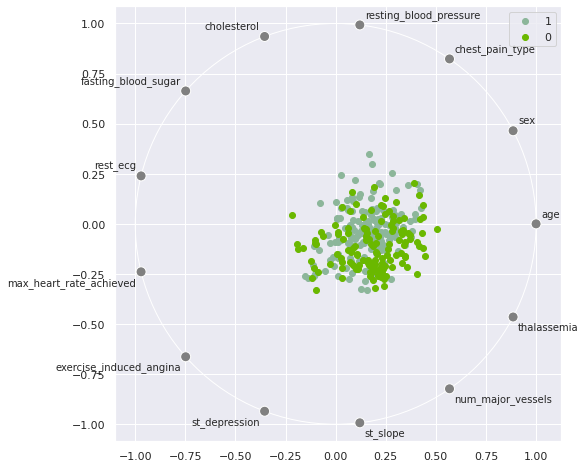

In [0]:
#RadViz
fig,ax=plt.subplots(figsize=(8, 8))
pd.plotting.radviz(dt, 'target',ax=ax) 
plt.show() 

In [0]:
dt.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
import plotly.express as px
fig = px.parallel_coordinates(dt, color="target",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             #color_continuous_midpoint=2
                              )
fig.show()

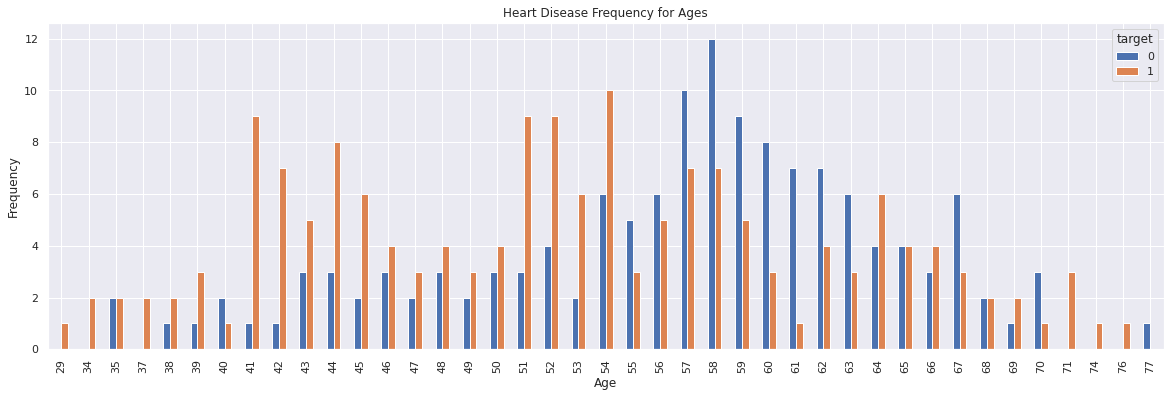

In [0]:
pd.crosstab(dt.age,dt.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [0]:
dt.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

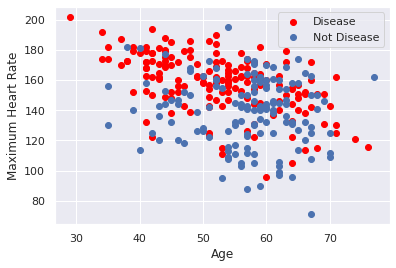

In [0]:
plt.scatter(x=dt.age[dt.target==1], y=dt.max_heart_rate_achieved[(dt.target==1)], c="red")
plt.scatter(x=dt.age[dt.target==0], y=dt.max_heart_rate_achieved[(dt.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [0]:
dt.columns.values

array(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia',
       'target'], dtype=object)

In [0]:
dt.shape[0]

303

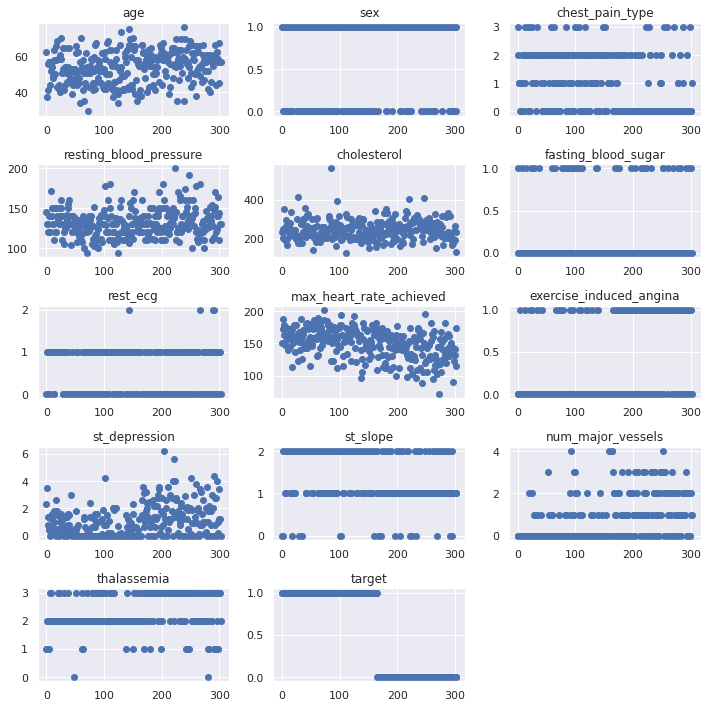

In [0]:
for i,col in enumerate(dt.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(dt.shape[0])],dt[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

In [0]:
!pip install bubbly

In [0]:
dt.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd
import re

In [0]:
fig = px.scatter(dt, x="resting_blood_pressure", y="cholesterol",
	         size="st_depression", color="sex",
                 #hover_name="country", 
                 log_x=True, size_max=60)
#fig.update_layout(height=400, width=1700)
fig.show()

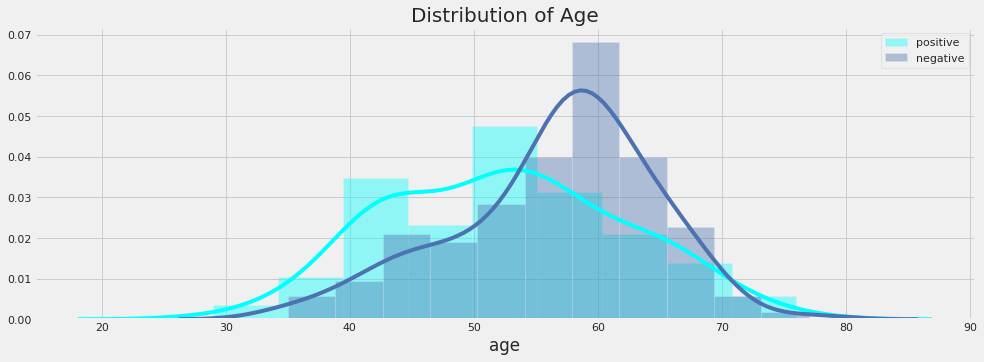

In [0]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(dt['age'][dt['target']==1], color = 'cyan',label='positive')
sns.distplot(dt['age'][dt['target']==0], color = 'b',label='negative')
plt.title('Distribution of Age', fontsize = 20)
plt.legend()
plt.show()

In [0]:
dt.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [0]:
trace = go.Scatter3d(
    x = dt['cholesterol'],
    y = dt['resting_blood_pressure'],
    z = dt['age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = dt['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Heart Rate'),
            zaxis = dict(title  = 'Age')
        )
    
)
fig = go.Figure(data = df, layout=layout)
fig.show()

<function matplotlib.pyplot.tight_layout>

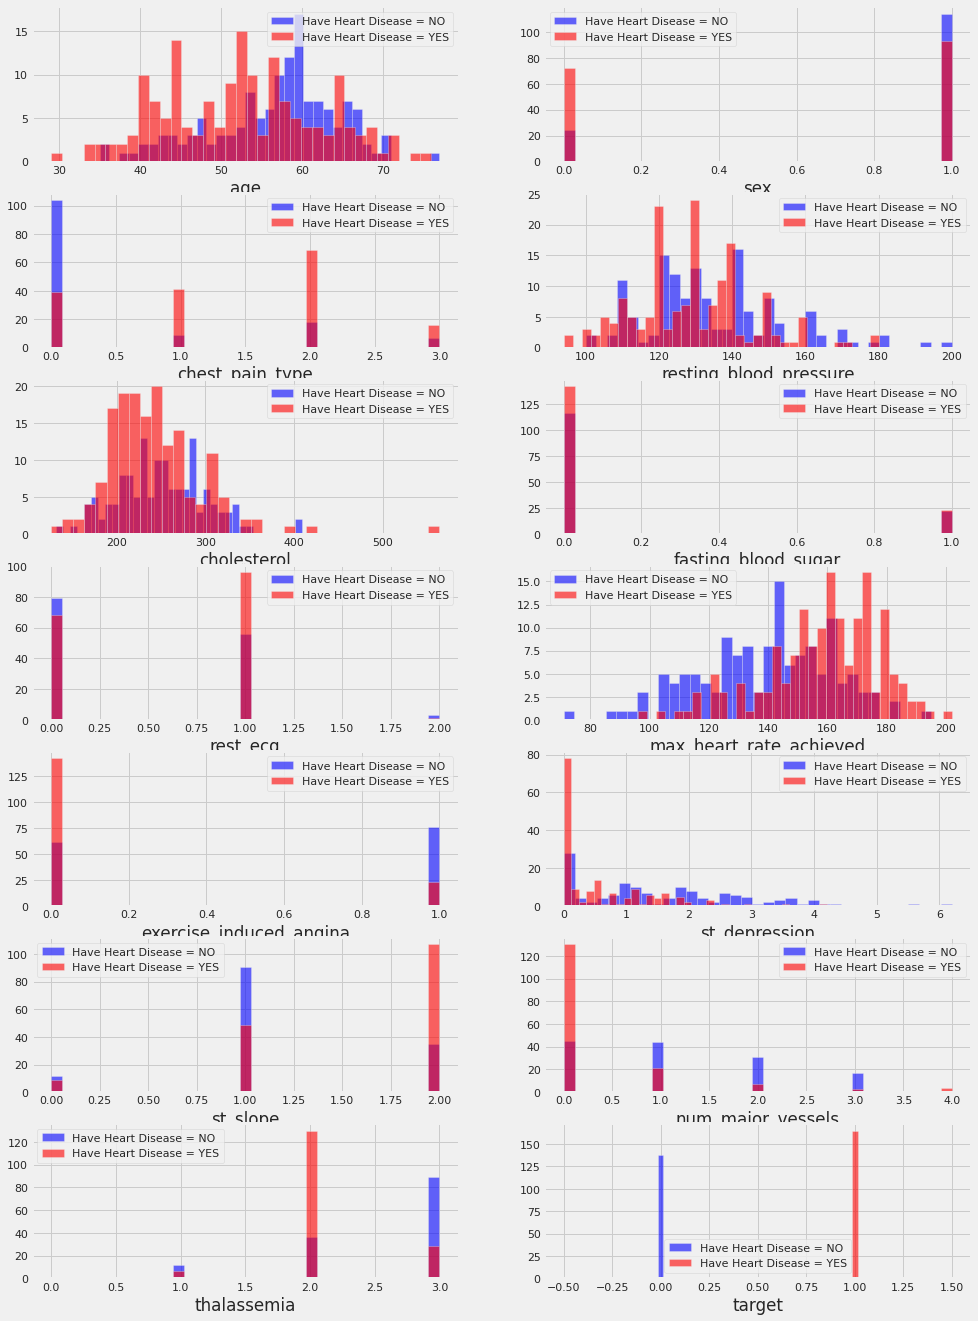

In [0]:
plt.figure(figsize=(15, 25))

for i, column in enumerate(dt.columns, 1):
  plt.subplot(8, 2, i)
  dt[dt["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
  dt[dt["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
  plt.legend()
  plt.xlabel(column)
plt.tight_layout


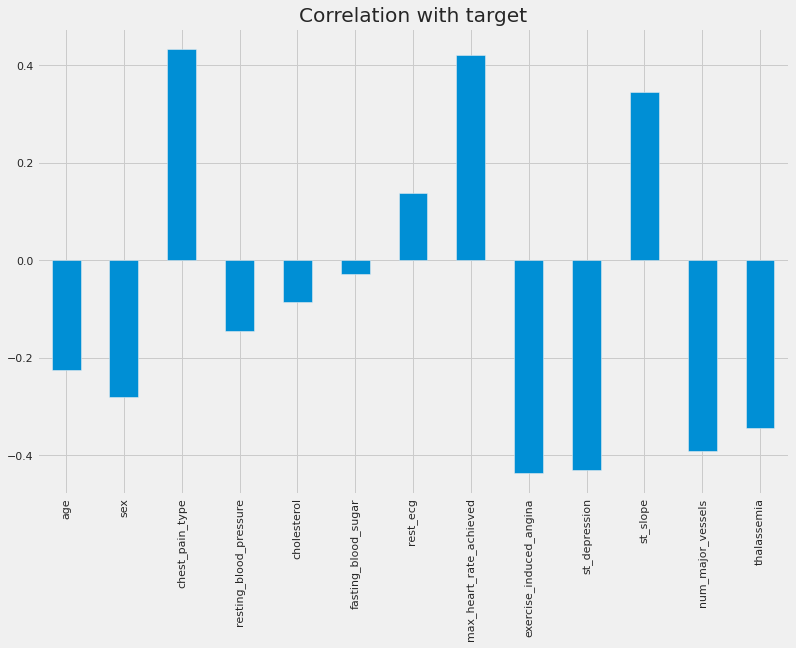

In [0]:
dt.drop('target', axis=1).corrwith(dt.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [0]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
import plotly.express as px
px.scatter(dt, x="age", y="resting_blood_pressure", 
           animation_frame="chest_pain_type",
           #animation_group="age",
           size="st_depression", 
           color="target", 
           #hover_name="sex",
           #log_x=True, 
           #size_max=55, range_x=[100,100000], range_y=[25,90]
           )

In [0]:
import plotly.express as px


fig = px.bar(dt, x="chest_pain_type", y="cholesterol", 
  animation_frame="thalassemia", 
  #animation_group="sex",
  color="target"
  )
fig.show()

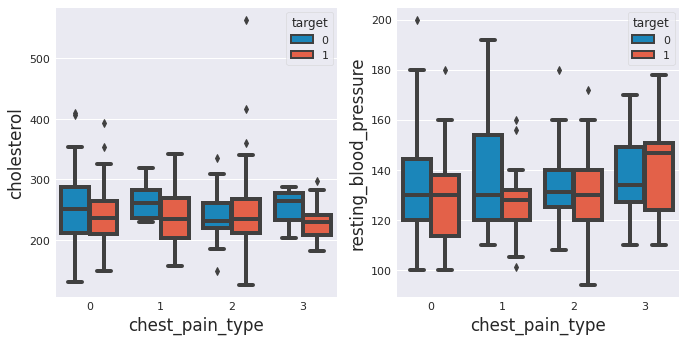

In [0]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,5),ncols=2)
ax1 = sns.boxplot(x="chest_pain_type", y="cholesterol", hue="target", data=dt, ax = ax[0]);
ax2 = sns.boxplot(x="chest_pain_type", y="resting_blood_pressure", hue="target", data=dt, ax = ax[1]);
#ax1.set_title("Training Set", fontsize = 18)
#ax2.set_title('Test Set',  fontsize = 18)


# ## Fixing legends
# leg_1 = ax1.get_legend()
# leg_1.set_title("PClass")
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')

fig.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



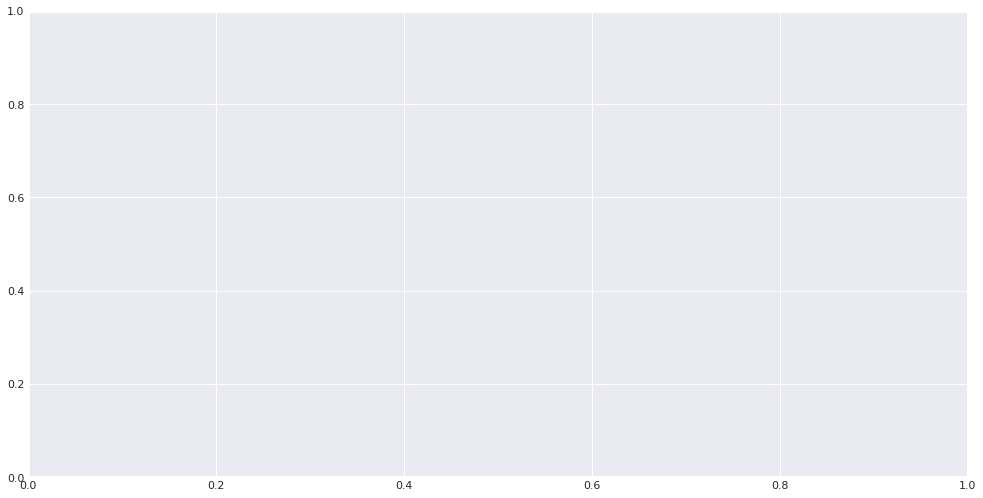

In [0]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 

ax=sns.kdeplot(dt[dt.target== 1],'chest_pain_type', 
               color='g',
               shade=True, 
               label='positive' 
              )
#plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
#plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
#plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
#labels = ['Upper', 'Middle', 'Lower']
#plt.xticks(sorted(train.Pclass.unique()), labels);

### PCA

In [0]:
dataX=dt.drop('target',axis=1)
dataY=dt['target']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,
                                               test_size=0.2,random_state=42,stratify=y)

In [0]:
X_train.shape

(242, 13)

StandardScaler 

In [0]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [0]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train) # number component default = number of features
print('pca.explained_variance_ratio_\n',pca.explained_variance_ratio_)
print()
print('Column\n',X_train.columns.values.tolist())
print()
print('pca components',pca.components_)

pca.explained_variance_ratio_
 [0.27209511 0.18717723 0.11638586 0.08997761 0.08195717 0.06043962
 0.05479391 0.03251024 0.03227494 0.02373795 0.02012017 0.0152775
 0.01325269]

Column
 ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']

pca components [[ 0.0609909   0.39230964 -0.32174717  0.02791357  0.0076638   0.07701487
  -0.06817762 -0.16961418  0.75099551  0.16279075 -0.27220407  0.13297181
   0.12803916]
 [ 0.09636338 -0.89543003 -0.16203103  0.05256783  0.11301215 -0.08388811
   0.01568016 -0.11006128  0.31964401  0.05590138 -0.14183601 -0.01615177
  -0.0453633 ]
 [ 0.10788387 -0.10216093  0.28247779  0.12705557  0.02915107  0.88428817
  -0.18868038 -0.00974313 -0.05451505  0.04817914 -0.19019068  0.14832867
  -0.00313368]
 [ 0.15860801  0.03501568 -0.09417947  0.08026752  0.03076663 -0.25222846
  -0.1

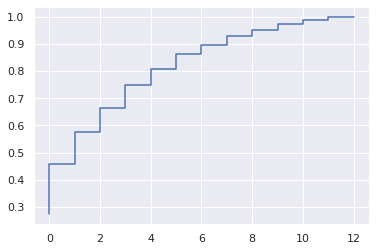

In [0]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

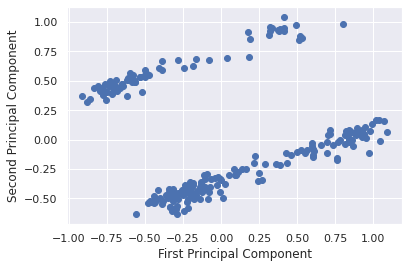

In [0]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [0]:
X_train.shape

(242, 13)

In [0]:
reduced_data_train.shape

(242, 8)